# 1. Import and Install Dependencies

In [75]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [76]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [77]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable but it save in temporary memory
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [78]:
def draw_styled_landmarks(image, results):
    #Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [79]:
cap = cv2.VideoCapture(1)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

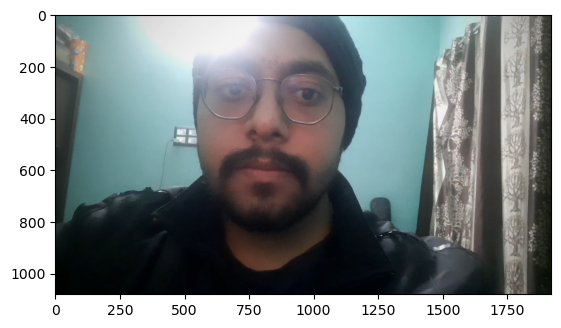

In [80]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

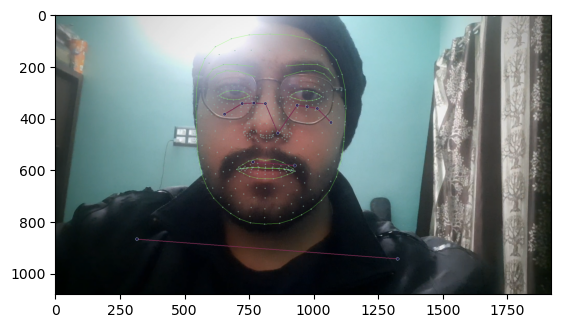

In [81]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

len(results.right_hand_landmarks.landmark) # here the landmarks are 21 because there total 21 circles are present in this picture that is those blue circles connected with pint line

# 3. Extract Keypoint Values

#### First we use a sample if the code is working or not

In [82]:
# now we are here to exctract all the landmarks in form of an array so we can use these keypoints value in the model prediction
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [83]:
pose

[array([ 0.44942072,  0.42518678, -1.21098602,  0.99976754]),
 array([ 0.48821831,  0.32677016, -1.14492571,  0.99941146]),
 array([ 0.50855762,  0.33063617, -1.14477813,  0.99953437]),
 array([ 0.52883846,  0.33730134, -1.14499557,  0.9992488 ]),
 array([ 0.42396301,  0.31959665, -1.14398146,  0.99944615]),
 array([ 0.40065956,  0.31845084, -1.14277291,  0.99949867]),
 array([ 0.37749228,  0.31978095, -1.14299715,  0.99931586]),
 array([ 0.55676103,  0.38716599, -0.66213715,  0.9993571 ]),
 array([ 0.34174567,  0.35829553, -0.63156724,  0.99970853]),
 array([ 0.48351339,  0.54145354, -1.02553666,  0.99954087]),
 array([ 0.39921853,  0.52855271, -1.01767647,  0.99969679]),
 array([ 0.6908865 ,  0.87459469, -0.33316287,  0.99364233]),
 array([ 0.16554925,  0.80402982, -0.3575342 ,  0.99324393]),
 array([ 0.87229657,  1.38616204, -0.41264793,  0.2631003 ]),
 array([-0.09756227,  1.3019017 , -0.27752686,  0.31958964]),
 array([ 0.80646759,  1.84637165, -0.86737126,  0.5243212 ]),
 array([

In [ ]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() # here we flatten the values so that we can out a single array to the model
pose

#### Now we applying in all the landmark for the pose, face, left hand and right hand

In [41]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4) 
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

# we are using np.zeroes here because most of the time what happen that video didnt capture the face part or any other part and because of that it also didnt calculate landmarks and ultimatley it throughs an error so for overcome this error we np.array so it puts the value zeros in the landmark.

In [84]:
# now let creata a function for extract those keypoints in more effiecnt way and concate into one arary for the model
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [ ]:
result_test = extract_keypoints(results)

In [ ]:
result_test # so the total number for keypoints are this 1662

In [ ]:
result_test.shape

In [ ]:
468*3+33*4+21*3+21*3 # total number of keypoints

In [ ]:
np.save('0', result_test) # saving for the testing purpose

In [ ]:
np.load('0.npy')

# 4. Setup Folders for Collection

# Now we Create a folder for each actions i.e.
# Angry
    ## each has 30 sequences
    ### 1
    ### 2
    ### 3
    ### 4
    ...
    ### 30
# Sad
    ## each has 30 sequences
    ### 1
    ### 2
    ### 3
    ### 4
    ...
    ### 30
# Happy
    ## each has 30 sequences
    ### 1
    ### 2
    ### 3
    ### 4
    ...
    ### 30
# No emotion
    ## each has 30 sequences
    ### 1
    ### 2
    ### 3
    ### 4
    ...
    ### 30

In [ ]:
import os

In [43]:


# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data_1')

# Actions that we try to detect
actions = np.array(['Angry', 'Happy','Sad'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
#start_folder = 30

In [44]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

In [ ]:
os.listdir

# 5. Collect Keypoint Values for Training and Testing

In [45]:
# now here we create number of loops by taking snapshot for each time
cap = cv2.VideoCapture(1)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:                  # 30 Frames of keypoints per video
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):
                # Collection Break
                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 128, 255), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [ ]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [46]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [47]:
label_map = {label:num for num, label in enumerate(actions)}

In [48]:
label_map

{'Angry': 0, 'Happy': 1, 'Sad': 2}

In [49]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [50]:
np.array(sequences).shape

(90, 30, 1662)

In [51]:
np.array(labels).shape

(90,)

In [52]:
X = np.array(sequences)

In [53]:
X.shape

(90, 30, 1662)

In [54]:
y = to_categorical(labels).astype(int)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [56]:
y_test.shape

(5, 3)

# 7. Build and Train LSTM Neural Network

In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [58]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [59]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [60]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [61]:
model.fit(X_train, y_train, epochs=200)

Epoch 1/200
3/3 [==============================] - 5s 65ms/step - loss: 1.1012 - categorical_accuracy: 0.4118
Epoch 2/200
3/3 [==============================] - 0s 65ms/step - loss: 1.8770 - categorical_accuracy: 0.3412
Epoch 3/200
3/3 [==============================] - 0s 63ms/step - loss: 1.0158 - categorical_accuracy: 0.4706
Epoch 4/200
3/3 [==============================] - 0s 69ms/step - loss: 2.1021 - categorical_accuracy: 0.3412
Epoch 5/200
3/3 [==============================] - 0s 73ms/step - loss: 1.0874 - categorical_accuracy: 0.4471
Epoch 6/200
3/3 [==============================] - 0s 69ms/step - loss: 1.0723 - categorical_accuracy: 0.3412
Epoch 7/200
3/3 [==============================] - 0s 68ms/step - loss: 1.0145 - categorical_accuracy: 0.3412
Epoch 8/200
3/3 [==============================] - 0s 70ms/step - loss: 0.9644 - categorical_accuracy: 0.3412
Epoch 9/200
3/3 [==============================] - 0s 69ms/step - loss: 0.9370 - categorical_accuracy: 0.5529
Epoch 10/2

In [62]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 30, 64)            442112    
                                                                 
 lstm_7 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_8 (LSTM)               (None, 64)                49408     
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 3)                 99        
                                                                 
Total params: 596675 (2.28 MB)
Trainable params: 59667

# 8. Make Predictions

In [63]:
res = model.predict(X_test)
res

1/1 [==============================] - 1s 932ms/step


array([[9.9961674e-01, 3.8287294e-04, 3.6644204e-07],
       [1.6163399e-03, 9.9668282e-01, 1.7008825e-03],
       [2.0990649e-02, 9.7862267e-01, 3.8669078e-04],
       [9.9587220e-01, 4.1252426e-03, 2.5723261e-06],
       [1.7836216e-10, 2.4508784e-06, 9.9999750e-01]], dtype=float32)

In [64]:
np.argmax(res[0])

0

In [65]:
actions[np.argmax(y_test[0])]

'Angry'

In [31]:
actions[np.argmax(y_test[0])]

'Angry'

# 9. Save Weights

In [66]:
model.save('actionsS.h5')

c:\ProgramData\Anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [63]:
del model

In [67]:
model.load_weights('actionsS.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [68]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [69]:
yhat = model.predict(X_test)

1/1 [==============================] - 0s 38ms/step


In [70]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [71]:
yhat

[0, 1, 1, 0, 2]

In [72]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[3, 0],
        [0, 2]],

       [[3, 0],
        [0, 2]],

       [[4, 0],
        [0, 1]]], dtype=int64)

In [73]:
accuracy_score(ytrue, yhat)

1.0

# 11. Test in Real Time

In [90]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.3

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
            
        #3. Viz logic
            
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [ ]:
from scipy import stats

In [ ]:
cap.release()
cv2.destroyAllWindows()